In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Button(description='Upload and Classify', style=ButtonStyle())

Saving 1.jpg to 1.jpg
Saving 10_0.jpg to 10_0 (3).jpg
Saving 10_2.jpg to 10_2 (3).jpg
Saving 11_2.jpg to 11_2 (1).jpg
Saving 15_0.jpg to 15_0 (2).jpg
Saving 110_1.jpg to 110_1.jpg
Saving 116_0.jpg to 116_0.jpg
Saving 0119.jpg to 0119.jpg
Saving abrasions (10).jpg to abrasions (10) (2).jpg
Saving abrasions (17).jpg to abrasions (17) (2).jpg
Saving abrasions (29).jpg to abrasions (29).jpg
Saving abrasions (34).jpg to abrasions (34) (2).jpg
Saving bruises (100).jpg to bruises (100).jpg
Saving bruises (103).jpg to bruises (103).jpg
Saving bruises (114).jpg to bruises (114) (1).jpg
Saving burns (1).jpg to burns (1).jpg
Saving burns (11).jpg to burns (11) (1).jpg
Saving burns (23).jpg to burns (23) (2).jpg
Saving burns (29).jpg to burns (29) (2).jpg
Saving burns (31).jpg to burns (31) (2).jpg
Saving cut (15).jpg to cut (15) (2).jpg
Saving cut (17).jpg to cut (17) (2).jpg
Saving cut (20).jpg to cut (20) (2).jpg
Saving cut (22).jpg to cut (22).jpg
Saving laseration (12).jpg to laseration (12) 

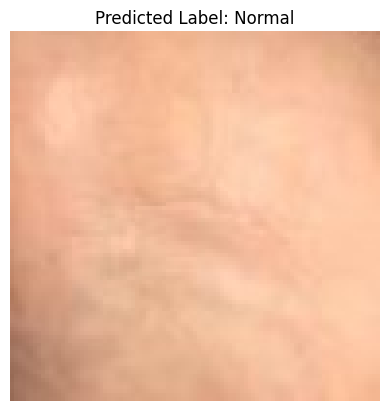

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


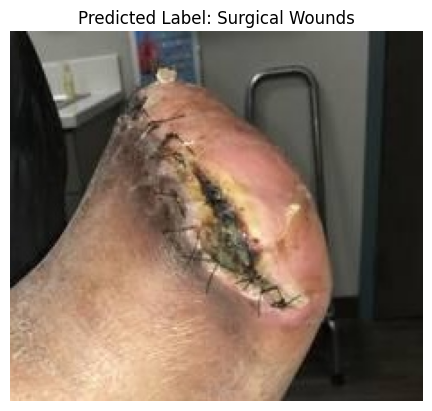

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


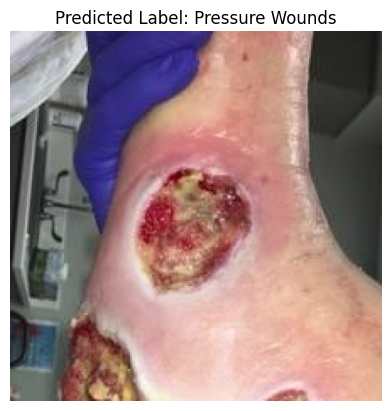

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


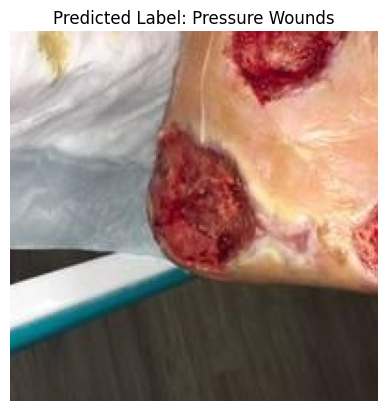

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


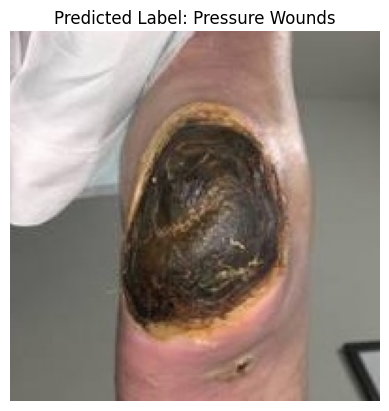

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


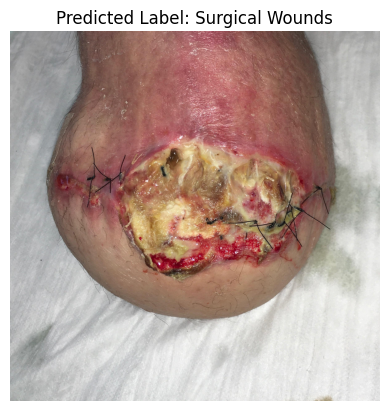

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


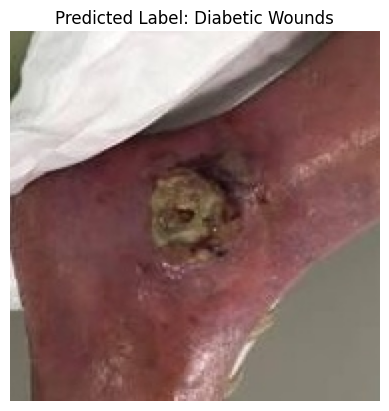

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


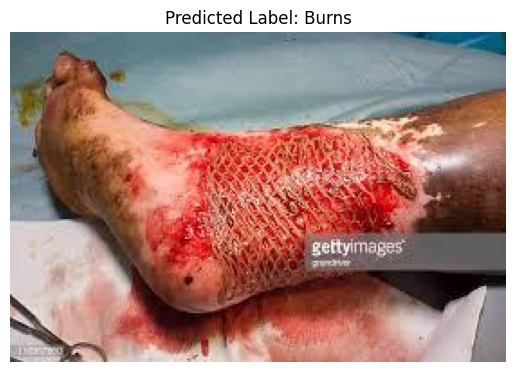

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


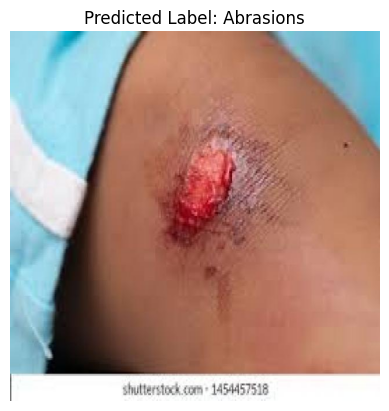

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


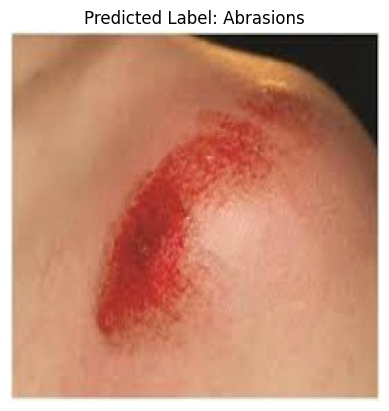

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


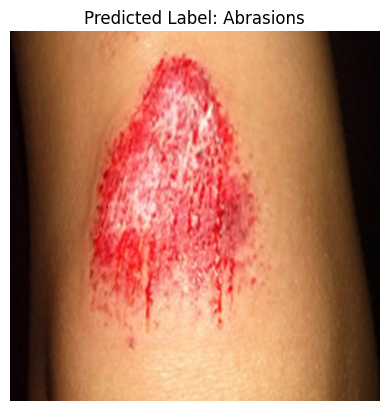

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


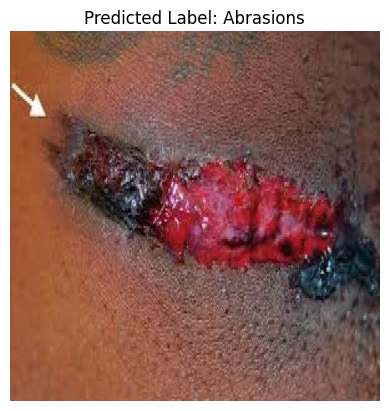

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


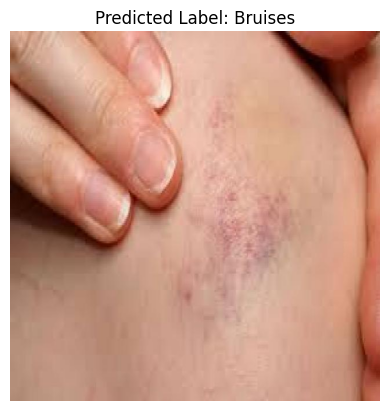

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


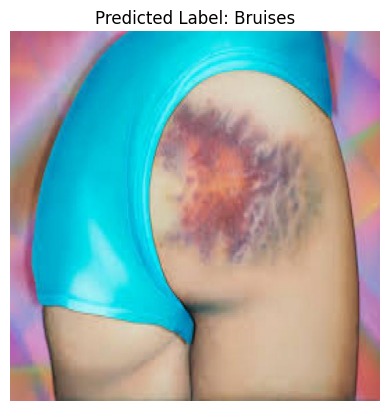

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


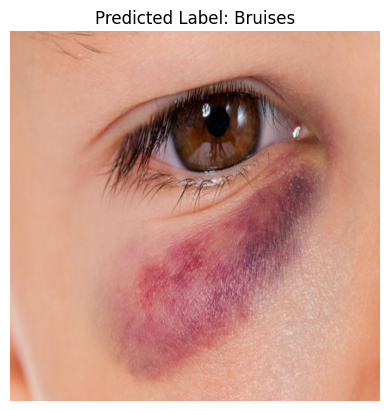

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


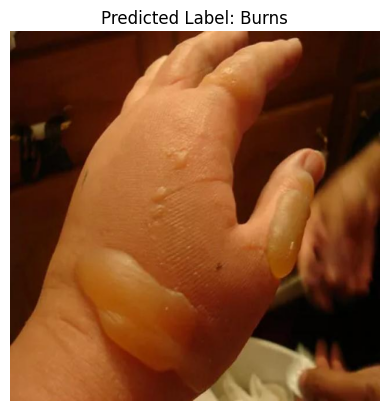

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


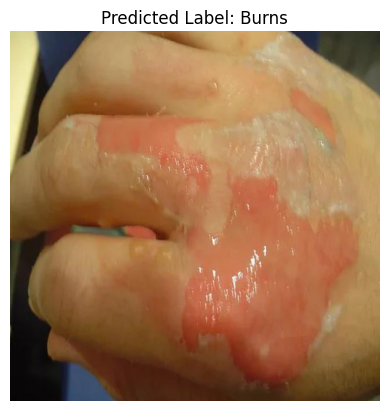

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


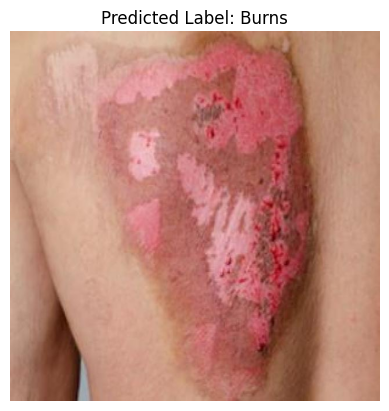

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


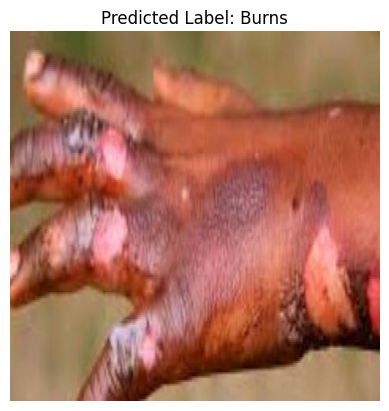

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


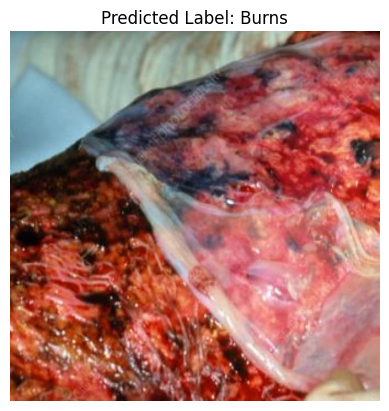

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


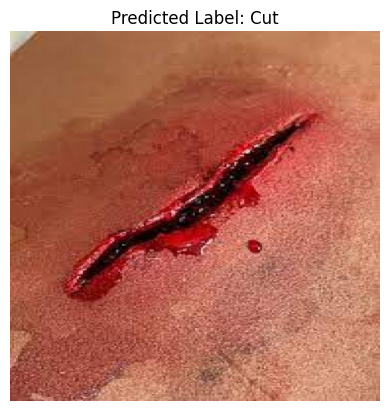

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


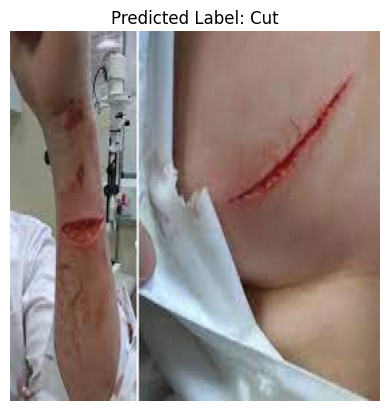

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


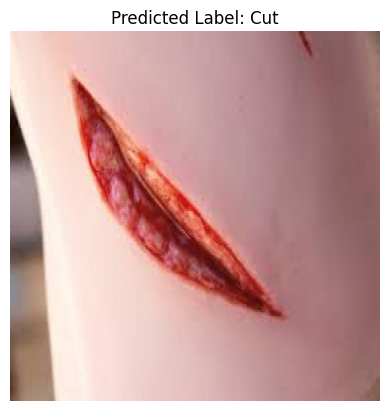

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


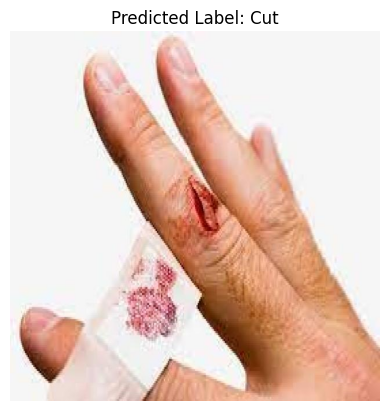

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


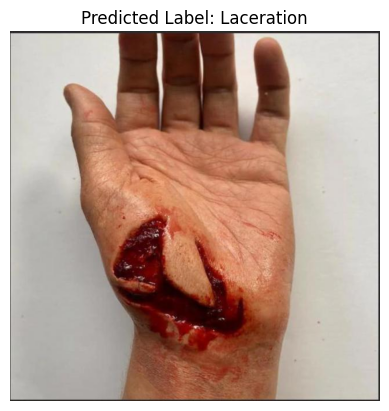

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


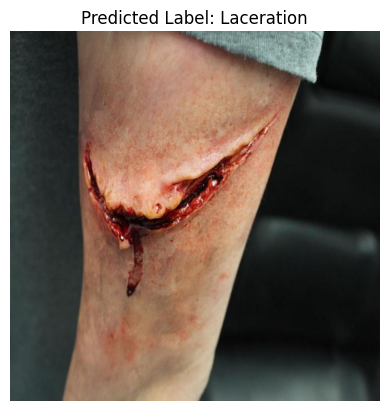

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


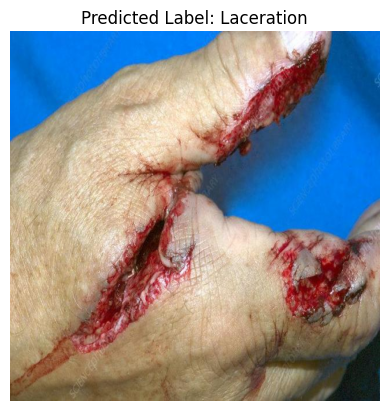

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


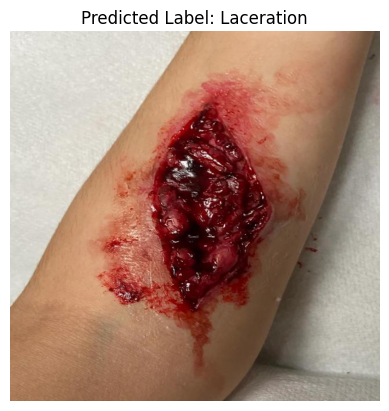

In [5]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from google.colab import files
from IPython.display import display
import ipywidgets as widgets
from sklearn.preprocessing import LabelEncoder


# Define the classes
classes = ['Abrasions', 'Bruises', 'Burns', 'Cut', 'Diabetic Wounds', 'Laceration', 'Normal', 'Pressure Wounds', 'Surgical Wounds', 'Venous Wounds']

# Create and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(classes)


model_path = '/content/drive/MyDrive/Collected and Categorized Wound Images (1).h5'
model = load_model(model_path)


def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img = img.astype('float32')
    img = preprocess_input(img)
    return img


def classify_image(btn):
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
        img_processed = preprocess_image(img)
        img_processed = np.expand_dims(img_processed, axis=0)


        predictions = model.predict(img_processed)
        predicted_class_index = np.argmax(predictions)
        predicted_label = label_encoder.classes_[predicted_class_index]


        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predicted Label: {predicted_label}')
        plt.show()


upload_button = widgets.Button(description="Upload and Classify")
upload_button.on_click(classify_image)
display(upload_button)